In [5]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install tensorflow==2.16.1
# %pip install scikit-learn
# %pip install setuptools
# %pip install --upgrade setuptools
# %pip install tensorflow keras
# %pip install seaborn
# %pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.9/589.9 MB 11.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

# Preparación de Datos

           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


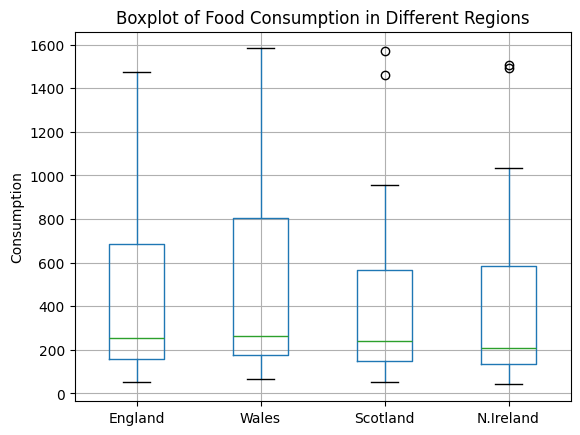

In [13]:
# Load the CSV file into a DataFrame
df = pd.read_csv('UK_foods.csv')
df.rename(columns={'Unnamed: 0': 'Foods'}, inplace=True)
df
# Display the summary statistics
print(df.describe())

# Plot the data to visualize the range of each feature
df[['England', 'Wales', 'Scotland', 'N.Ireland']].boxplot()
plt.title('Boxplot of Food Consumption in Different Regions')
plt.ylabel('Consumption')
plt.show()
data = df[['England','Wales', 'Scotland', 'N.Ireland']].values

# Data Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Construcción del Autocodificador

In [15]:
# Codificador
codificador = Sequential()
codificador.add(Dense(units=3, activation='relu', input_shape=[data_scaled.shape[1]]))
codificador.add(Dense(units=2, activation='relu'))
# Decodificador
decodificador = Sequential()
decodificador.add(Dense(units=3, activation='relu', input_shape=[2]))
decodificador.add(Dense(units=data_scaled.shape[1], activation='sigmoid'))
# Autocodificador
autoencoder = Sequential([codificador, decodificador])

In [16]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=16, shuffle=True)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2346
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2632 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2456 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2426 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2329 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2325 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2613 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2491 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2666 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2357 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2478 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2302 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2138 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2134 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2591 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━

In [17]:
loss = autoencoder.evaluate(data_scaled, data_scaled)
print(f'Pérdida de reconstrucción: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 1.2353
Pérdida de reconstrucción: 1.2352771759033203


# Reducción de Dimensiones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


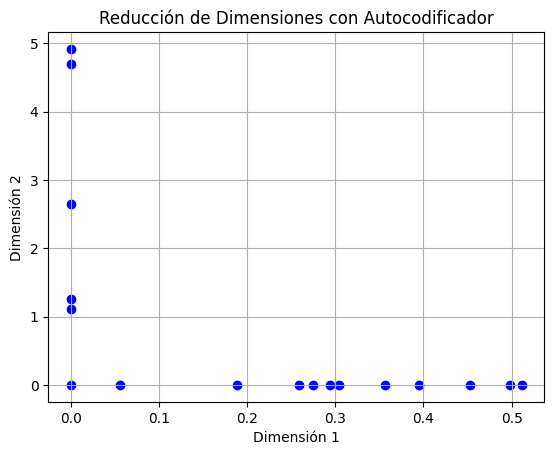

In [23]:
codificado_2dim = autoencoder.predict(data_scaled)
codificado_2dim.shape

plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c='blue', marker='o')
plt.title('Reducción de Dimensiones con Autocodificador')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()